In [126]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [127]:
#Importing bug query from google cloud
from google.cloud import bigquery

In [128]:
#Getting all the trips data from year 2020
data = bigquery.Client().query(''' select *
                                    from `rsamala-project.chicago_taxitrips.taxi_trips` 
                                    WHERE trip_start_timestamp > '2020-01-01' AND trip_start_timestamp <= '2020-12-31' ''')

In [129]:
#converting the data into pandas dataframe
df=data.to_dataframe()

In [130]:
#Checking the first 5 trips details
df.head()

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,34e3574a8a3187fa0f2854fa5f955fa6b81e9d15,6c6cc4c518e70492231337ec2a17326e405aa40ad33ee5...,2020-02-14 21:00:00+00:00,2020-02-14 21:00:00+00:00,480,0.0,<NA>,<NA>,14,14,...,0.0,7.50,Cash,Taxi Affiliation Services,41.968069,-87.721559,POINT (-87.7215590627 41.968069),41.968069,-87.721559,POINT (-87.7215590627 41.968069)
1,36f0fe086629ef8998e98f649e8303d550c4d017,918e4b0b5ee31425b7c511d49dd73b371abdd9159c793d...,2020-02-13 22:30:00+00:00,2020-02-13 22:45:00+00:00,360,1.4,17031080300,17031842300,8,24,...,0.0,9.00,Credit Card,Taxi Affiliation Services,41.907492,-87.635760,POINT (-87.6357600901 41.9074919303),41.898306,-87.653614,POINT (-87.6536139825 41.8983058696)
2,364623f9ad0ac0758c716327de8244d724751c87,f388a64dbbec77476c30f449f329c630486be0fdb4929b...,2020-02-25 14:45:00+00:00,2020-02-25 15:00:00+00:00,960,6.3,<NA>,<NA>,39,45,...,0.0,18.50,Cash,Taxi Affiliation Services,41.808916,-87.596183,POINT (-87.5961833442 41.8089162826),41.744200,-87.586348,POINT (-87.5863483178 41.7441995348)
3,23ace5faa7aa23ccab719bcd9add8a2863b13f7f,3cc07933fdf2b81d7ba8ad2e7eff9b52c2a427e45ead57...,2020-01-10 08:30:00+00:00,2020-01-10 08:30:00+00:00,180,0.0,<NA>,<NA>,75,53,...,0.0,3.25,Cash,Blue Ribbon Taxi Association Inc.,41.689730,-87.669054,POINT (-87.6690544032 41.6897299145),41.673820,-87.635740,POINT (-87.6357397768 41.6738199043)
4,1625b6c1bd8c8e5400fd72cbaaef5100a28c6eb1,1e5d8c5b03423e50107a1302f325ffe3824444279ef99a...,2020-01-02 09:30:00+00:00,2020-01-02 09:30:00+00:00,240,0.0,17031080100,17031081403,8,8,...,0.0,7.00,Credit Card,Taxi Affiliation Services,41.907520,-87.626659,POINT (-87.6266589003 41.9075200747),41.890922,-87.618868,POINT (-87.6188683546 41.8909220259)


In [131]:
#Getting the information of all trips and their attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883190 entries, 0 to 3883189
Data columns (total 23 columns):
 #   Column                  Dtype              
---  ------                  -----              
 0   unique_key              object             
 1   taxi_id                 object             
 2   trip_start_timestamp    datetime64[ns, UTC]
 3   trip_end_timestamp      datetime64[ns, UTC]
 4   trip_seconds            Int64              
 5   trip_miles              float64            
 6   pickup_census_tract     Int64              
 7   dropoff_census_tract    Int64              
 8   pickup_community_area   Int64              
 9   dropoff_community_area  Int64              
 10  fare                    float64            
 11  tips                    float64            
 12  tolls                   float64            
 13  extras                  float64            
 14  trip_total              float64            
 15  payment_type            object             
 16  

In [135]:
nan_count = df.isna().sum()
print(nan_count )

unique_key                      0
taxi_id                         0
trip_start_timestamp            0
trip_end_timestamp            574
trip_seconds                 1542
trip_miles                     30
pickup_census_tract       2100715
dropoff_census_tract      2113174
pickup_community_area      278372
dropoff_community_area     368079
fare                          332
tips                          332
tolls                         332
extras                        332
trip_total                    332
payment_type                    0
company                         0
pickup_latitude            277673
pickup_longitude           277673
pickup_location            277673
dropoff_latitude           361373
dropoff_longitude          361373
dropoff_location           361373
dtype: int64


In [137]:
df=df.dropna()
df

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
1,36f0fe086629ef8998e98f649e8303d550c4d017,918e4b0b5ee31425b7c511d49dd73b371abdd9159c793d...,2020-02-13 22:30:00+00:00,2020-02-13 22:45:00+00:00,360,1.40,17031080300,17031842300,8,24,...,0.0,9.00,Credit Card,Taxi Affiliation Services,41.907492,-87.635760,POINT (-87.6357600901 41.9074919303),41.898306,-87.653614,POINT (-87.6536139825 41.8983058696)
4,1625b6c1bd8c8e5400fd72cbaaef5100a28c6eb1,1e5d8c5b03423e50107a1302f325ffe3824444279ef99a...,2020-01-02 09:30:00+00:00,2020-01-02 09:30:00+00:00,240,0.00,17031080100,17031081403,8,8,...,0.0,7.00,Credit Card,Taxi Affiliation Services,41.907520,-87.626659,POINT (-87.6266589003 41.9075200747),41.890922,-87.618868,POINT (-87.6188683546 41.8909220259)
7,adf63617de282a79eac25d637e7dbf36126ff723,261b4db1c52868b756351f3cba8d9cc18cbb0166b27610...,2020-03-05 22:15:00+00:00,2020-03-05 22:15:00+00:00,369,1.74,17031243500,17031243500,24,24,...,0.0,11.00,Credit Card,24 Seven Taxi,41.892658,-87.652534,POINT (-87.6525344838 41.8926581076),41.892658,-87.652534,POINT (-87.6525344838 41.8926581076)
8,ade0e4329779c0a2767d3bb0a66e5dd6a148fcc8,8f2261a1173054365b6a9c751af24187ae1f93b70b7e61...,2020-03-05 19:15:00+00:00,2020-03-05 19:15:00+00:00,840,0.00,17031081000,17031320100,8,32,...,0.0,10.00,Cash,Choice Taxi Association,41.900266,-87.632109,POINT (-87.6321092196 41.9002656868),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)
9,afd2ddc4897ec24357a8352f705ab8b790921e9c,83de099ba2ef07137824fed2955fb4b6865e2a0dc77a38...,2020-03-06 22:15:00+00:00,2020-03-06 22:15:00+00:00,289,1.01,17031080300,17031071400,8,7,...,0.0,5.50,Cash,Chicago Carriage Cab Corp,41.907492,-87.635760,POINT (-87.6357600901 41.9074919303),41.922083,-87.634156,POINT (-87.6341560931 41.922082541)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883184,1b964cf0b44b3dd6299cd42546503bfa243737c1,6b1b1e151c90fecc87c9f51e5e607acea049dedc6c5091...,2020-01-17 14:00:00+00:00,2020-01-17 14:30:00+00:00,2105,17.91,17031980000,17031081500,76,8,...,4.0,60.94,Credit Card,Sun Taxi,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.892508,-87.626215,POINT (-87.6262149064 41.8925077809)
3883185,20f3e8f0807d4f8159212ce4d81e10e9e8537510,3abd6b9b6ecdd7475cc4f1a906f7c40564f5c39d0e6d34...,2020-01-22 20:45:00+00:00,2020-01-22 21:15:00+00:00,1712,18.18,17031980000,17031839100,76,32,...,4.0,56.92,Credit Card,24 Seven Taxi,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707)
3883187,242832e434fd53ea0c1907136efae026c4fcd32e,5dc447efec0b9973e20cef8e1a16715fdb4e34c4edb4c5...,2020-01-11 16:30:00+00:00,2020-01-11 17:00:00+00:00,2091,17.55,17031980000,17031081500,76,8,...,4.0,53.50,Credit Card,Sun Taxi,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.892508,-87.626215,POINT (-87.6262149064 41.8925077809)
3883188,227817474ebf911a0efa8798ae54969f02fadf2e,cd83cfd25c229da8eb9bedfd1b2e7c7dc2d647d77739d4...,2020-01-27 11:00:00+00:00,2020-01-27 11:30:00+00:00,1620,17.70,17031980000,17031081700,76,8,...,4.0,57.40,Credit Card,Star North Management LLC,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365)


In [ ]:
nan_count = df.isna().sum()
print(nan_count )

In [138]:
#Getting the statistical values of the attributes
df.describe()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,1.743803e+06,1.743803e+06,1.743803e+06,1.743803e+06,1.743803e+06,1.743803e+06,1.743803e+06,1.743803e+06,1.743803e+06,1.743803e+06,1.743803e+06,1.743803e+06,1.743803e+06,1.743803e+06,1.743803e+06
mean,6.697181e+02,2.462554e+00,1.703142e+10,1.703139e+10,2.631877e+01,2.288903e+01,1.247389e+01,1.667338e+00,6.507501e-04,7.612972e-01,1.503877e+01,4.189225e+01,-8.765167e+01,4.189085e+01,-8.764205e+01
std,1.110200e+03,5.126307e+00,3.407657e+05,3.319522e+05,1.807472e+01,1.536289e+01,9.464059e+01,2.661518e+00,1.630873e-01,1.852455e+01,9.676001e+01,2.935582e-02,7.195433e-02,2.361495e-02,5.108189e-02
min,0.000000e+00,0.000000e+00,1.703101e+10,1.703101e+10,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.165022e+01,-8.790304e+01,4.166737e+01,-8.790304e+01
25%,3.000000e+02,5.000000e-01,1.703108e+10,1.703108e+10,8.000000e+00,8.000000e+00,5.750000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.750000e+00,4.188099e+01,-8.764090e+01,4.188099e+01,-8.763857e+01
50%,4.800000e+02,1.000000e+00,1.703132e+10,1.703128e+10,2.800000e+01,2.800000e+01,7.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,8.750000e+00,4.188499e+01,-8.763275e+01,4.188530e+01,-8.763211e+01
75%,7.200000e+02,1.700000e+00,1.703184e+10,1.703184e+10,3.200000e+01,3.200000e+01,9.250000e+00,2.000000e+00,0.000000e+00,1.000000e+00,1.150000e+01,4.189322e+01,-8.762197e+01,4.189322e+01,-8.762197e+01
max,8.628000e+04,9.936000e+02,1.703198e+10,1.703198e+10,7.700000e+01,7.700000e+01,9.800260e+03,3.000000e+02,9.000000e+01,7.612340e+03,9.800300e+03,4.202122e+01,-8.753139e+01,4.202122e+01,-8.753139e+01


In [140]:
#Converting trip start timestamp to datetime format
df['strtdate'] = pd.to_datetime(df['trip_start_timestamp']) 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [141]:
#Converting trip end timestamp to datetime format
df['enddate'] = pd.to_datetime(df['trip_end_timestamp']) 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [142]:
#Checking the data of only January 2020
mask = (df['strtdate']>'2020-01-01') & (df['strtdate'] <= '2020-01-31')
df[mask]

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location,strtdate,enddate
4,1625b6c1bd8c8e5400fd72cbaaef5100a28c6eb1,1e5d8c5b03423e50107a1302f325ffe3824444279ef99a...,2020-01-02 09:30:00+00:00,2020-01-02 09:30:00+00:00,240,0.00,17031080100,17031081403,8,8,...,Credit Card,Taxi Affiliation Services,41.907520,-87.626659,POINT (-87.6266589003 41.9075200747),41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),2020-01-02 09:30:00+00:00,2020-01-02 09:30:00+00:00
115,301fa229a09d2b01c0a04a8050c67946c1863369,11f73b08790612efe341cf8cf69cadbcb7732293794186...,2020-01-22 12:45:00+00:00,2020-01-22 13:00:00+00:00,660,2.30,17031080201,17031320400,8,32,...,Cash,Choice Taxi Association,41.909496,-87.630964,POINT (-87.630963601 41.9094956686),41.877406,-87.621972,POINT (-87.6219716519 41.8774061234),2020-01-22 12:45:00+00:00,2020-01-22 13:00:00+00:00
116,2e353b6a18f5498ca962dc5821c2648099f29c94,9e923176b8dde7f338d9aeb93b1c45d198ddf767ac6985...,2020-01-11 22:45:00+00:00,2020-01-11 23:00:00+00:00,271,0.38,17031833000,17031833000,28,28,...,Cash,Chicago Carriage Cab Corp,41.885281,-87.657233,POINT (-87.6572331997 41.8852813201),41.885281,-87.657233,POINT (-87.6572331997 41.8852813201),2020-01-11 22:45:00+00:00,2020-01-11 23:00:00+00:00
118,311ec8d27051d3e18d736f425240e96b4cc668a6,9ed3d450497cbb3cb1093ac395f7b7b2a9830718003318...,2020-01-13 08:15:00+00:00,2020-01-13 08:30:00+00:00,992,3.56,17031061902,17031081500,6,8,...,Credit Card,Chicago Carriage Cab Corp,41.943155,-87.640698,POINT (-87.640698076 41.9431550855),41.892508,-87.626215,POINT (-87.6262149064 41.8925077809),2020-01-13 08:15:00+00:00,2020-01-13 08:30:00+00:00
120,329592aed27fabf53ec4d5ad5b51512d9aba5992,bda723ff7d3238b616907b89512c7279801247b0658190...,2020-01-04 11:00:00+00:00,2020-01-04 11:00:00+00:00,188,0.34,17031081000,17031081201,8,8,...,Cash,Flash Cab,41.900266,-87.632109,POINT (-87.6321092196 41.9002656868),41.899156,-87.626211,POINT (-87.6262105324 41.8991556134),2020-01-04 11:00:00+00:00,2020-01-04 11:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883183,1a882ddd15021fcf1804105870b077ee0808ed6f,00b748881be01a2d40ef5c65907ffdb86d732a2a50c024...,2020-01-24 09:00:00+00:00,2020-01-24 09:45:00+00:00,2644,17.55,17031980000,17031839100,76,32,...,Credit Card,Sun Taxi,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),2020-01-24 09:00:00+00:00,2020-01-24 09:45:00+00:00
3883184,1b964cf0b44b3dd6299cd42546503bfa243737c1,6b1b1e151c90fecc87c9f51e5e607acea049dedc6c5091...,2020-01-17 14:00:00+00:00,2020-01-17 14:30:00+00:00,2105,17.91,17031980000,17031081500,76,8,...,Credit Card,Sun Taxi,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.892508,-87.626215,POINT (-87.6262149064 41.8925077809),2020-01-17 14:00:00+00:00,2020-01-17 14:30:00+00:00
3883185,20f3e8f0807d4f8159212ce4d81e10e9e8537510,3abd6b9b6ecdd7475cc4f1a906f7c40564f5c39d0e6d34...,2020-01-22 20:45:00+00:00,2020-01-22 21:15:00+00:00,1712,18.18,17031980000,17031839100,76,32,...,Credit Card,24 Seven Taxi,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),2020-01-22 20:45:00+00:00,2020-01-22 21:15:00+00:00
3883187,242832e434fd53ea0c1907136efae026c4fcd32e,5dc447efec0b9973e20cef8e1a16715fdb4e34c4edb4c5...,2020-01-11 16:30:00+00:00,2020-01-11 17:00:00+00:00,2091,17.55,17031980000,17031081500,76,8,...,Credit Card,Sun Taxi,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.892508,-87.626215,POINT (-87.6262149064 41.8925077809),2020-01-11 16:30:00+00:00,2020-01-11 17:00:00+00:00


In [143]:
#Creating a new attribute of month from datetime information of trips
df['month'] = pd.to_datetime(df['strtdate']).dt.to_period('M')
df[df['month']=='2020-06'] #Checking the june month data of 2020

/opt/conda/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1146: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location,strtdate,enddate,month
29259,24b801de72364f2f1a63eceea8eb6db4f9f815e9,6c1e4e8e25a1b47575b359c5a0844cf23c50e540a86ecd...,2020-06-28 14:30:00+00:00,2020-06-28 14:30:00+00:00,103,0.26,17031080201,17031080201,8,8,...,Flash Cab,41.909496,-87.630964,POINT (-87.630963601 41.9094956686),41.909496,-87.630964,POINT (-87.630963601 41.9094956686),2020-06-28 14:30:00+00:00,2020-06-28 14:30:00+00:00,2020-06
29265,28a813f2e515cc26f2af47380031d7fd065d27af,160c160e380e228b8342089a35d6ab124aaf931ba1f02c...,2020-06-11 15:00:00+00:00,2020-06-11 15:00:00+00:00,158,0.00,17031081100,17031081100,8,8,...,City Service,41.900221,-87.629105,POINT (-87.6291051864 41.9002212967),41.900221,-87.629105,POINT (-87.6291051864 41.9002212967),2020-06-11 15:00:00+00:00,2020-06-11 15:00:00+00:00,2020-06
29284,8c25e6f4674f63c5f51e72f12f15a0fd88f8fc33,58c784c628cc2b0b77468e6a406acea729301abbc17a62...,2020-06-29 11:30:00+00:00,2020-06-29 11:30:00+00:00,180,0.00,17031110502,17031110502,11,11,...,Taxi Affiliation Services,41.970289,-87.759857,POINT (-87.759857019 41.970288894),41.970289,-87.759857,POINT (-87.759857019 41.970288894),2020-06-29 11:30:00+00:00,2020-06-29 11:30:00+00:00,2020-06
89405,4a4cfbf69071382aee3625429146ae0e06a38a44,33d0b751a7c55e6c8ce21d8226710db0da56a644ed6d07...,2020-06-29 13:30:00+00:00,2020-06-29 13:30:00+00:00,38,0.00,17031010702,17031010702,1,1,...,Flash Cab,42.009018,-87.672724,POINT (-87.6727239593 42.0090182269),42.009018,-87.672724,POINT (-87.6727239593 42.0090182269),2020-06-29 13:30:00+00:00,2020-06-29 13:30:00+00:00,2020-06
106531,2eed909bf009d54ba36f2ebf0df47a496aa26882,4b73d19af7e1fe6e8ad6b095cf52b354b0b5fad0edca75...,2020-06-03 17:15:00+00:00,2020-06-03 17:15:00+00:00,286,0.49,17031081000,17031080202,8,8,...,Flash Cab,41.900266,-87.632109,POINT (-87.6321092196 41.9002656868),41.905858,-87.630865,POINT (-87.6308650266 41.9058577688),2020-06-03 17:15:00+00:00,2020-06-03 17:15:00+00:00,2020-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3879103,0663667968d936038ff4a9a2aefb4791929b9a93,d41ab2be597b82c3e6b0b0ecccf98883a84db0d9aed4f6...,2020-06-16 19:45:00+00:00,2020-06-16 20:00:00+00:00,600,3.30,17031980000,17031980000,76,76,...,"Taxicab Insurance Agency, LLC",41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),2020-06-16 19:45:00+00:00,2020-06-16 20:00:00+00:00,2020-06
3879196,2367acb2a0eb06ba7fa3bfdb13576983ecc7b009,18cc8f12635a8251621a44661119a9d3c551d47b75a30d...,2020-06-30 16:00:00+00:00,2020-06-30 16:45:00+00:00,2493,17.51,17031980000,17031081500,76,8,...,Chicago Independents,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.892508,-87.626215,POINT (-87.6262149064 41.8925077809),2020-06-30 16:00:00+00:00,2020-06-30 16:45:00+00:00,2020-06
3879413,d757db3eb464130c90bbd13fbb0bf6c617fe68d2,35057a271731c5b976bda25efe85aa0c1901d0a5fc9ba2...,2020-06-06 17:45:00+00:00,2020-06-06 18:00:00+00:00,240,1.50,17031980000,17031980000,76,76,...,Chicago Independents,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),2020-06-06 17:45:00+00:00,2020-06-06 18:00:00+00:00,2020-06
3880048,aebcb79f7799fe5ed7c77a1322315e5ddf316aaf,feb9a71dcd524378d243372a5a61e3d50553304b130979...,2020-06-19 11:30:00+00:00,2020-06-19 12:30:00+00:00,3477,6.72,17031980000,17031980000,76,76,...,Flash Cab,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),2020-06-19 11:30:00+00:00,2020-06-19 12:30:00+00:00,2020-06


In [144]:
#Getting the start and end months of the data of 2020
months = df['month'].sort_values()
start_month = months.iloc[0]
end_month = months.iloc[-1]
print(start_month)
print(end_month)

2020-01
2020-12


In [145]:
#Grouping by each month and counting all attributes
df1=df.groupby([df['strtdate'].dt.year.rename('year'), df['strtdate'].dt.month.rename('month')]).agg({'count'})
df1

unique_key taxi_id trip_start_timestamp trip_end_timestamp  \
                count   count                count              count   
year month                                                              
2020 1         657600  657600               657600             657600   
     2         698754  698754               698754             698754   
     3         300813  300813               300813             300813   
     4            560     560                  560                560   
     5            959     959                  959                959   
     6           4708    4708                 4708               4708   
     7          10198   10198                10198              10198   
     8          11669   11669                11669              11669   
     9          17381   17381                17381              17381   
     10         19970   19970                19970              19970   
     11         10569   10569                10569              10569   
     12         10622   10622                10622              10622   

           trip_seconds trip_miles pickup_census_tract dropoff_census_tract  \
                  count      count               count                count   
year month                                                                    
2020 1           657600     657600              657600               657600   
     2           698754     698754              698754               698754   
     3           300813     300813              300813               300813   
     4              560        560                 560                  560   
     5              959        959                 959                  959   
     6             4708       4708                4708                 4708   
     7            10198      10198               10198                10198   
     8            11669      11669               11669                11669   
     9            17381      17381               17381                17381   
     10           19970      19970               19970                19970   
     11           10569      10569               10569                10569   
     12           10622      10622               10622                10622   

           pickup_community_area dropoff_community_area  ... company  \
                           count                  count  ...   count   
year month                                               ...           
2020 1                    657600                 657600  ...  657600   
     2                    698754                 698754  ...  698754   
     3                    300813                 300813  ...  300813   
     4                       560                    560  ...     560   
     5                       959                    959  ...     959   
     6                      4708                   4708  ...    4708   
     7                     10198                  10198  ...   10198   
     8                     11669                  11669  ...   11669   
     9                     17381                  17381  ...   17381   
     10                    19970                  19970  ...   19970   
     11                    10569                  10569  ...   10569   
     12                    10622                  10622  ...   10622   

           pickup_latitude pickup_longitude pickup_location dropoff_latitude  \
                     count            count           count            count   
year month                                                                     
2020 1              657600           657600          657600           657600   
     2              698754           698754          698754           698754   
     3              300813           300813          300813           300813   
     4                 560              560             560              560   
     5                 959              959             959              959   
     6  

Text(0, 0.5, 'Number of trips')

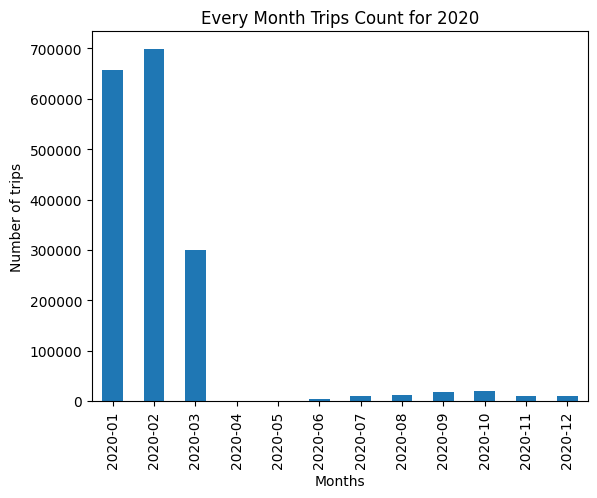

In [147]:
#Plot of number of trips per each month
df['month'].value_counts()[['2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12']].plot(kind='bar')#, data=df_sorted)
plt.title('Every Month Trips Count for 2020')
plt.xlabel('Months')
plt.ylabel('Number of trips')


Text(0, 0.5, 'Number Of Trips')

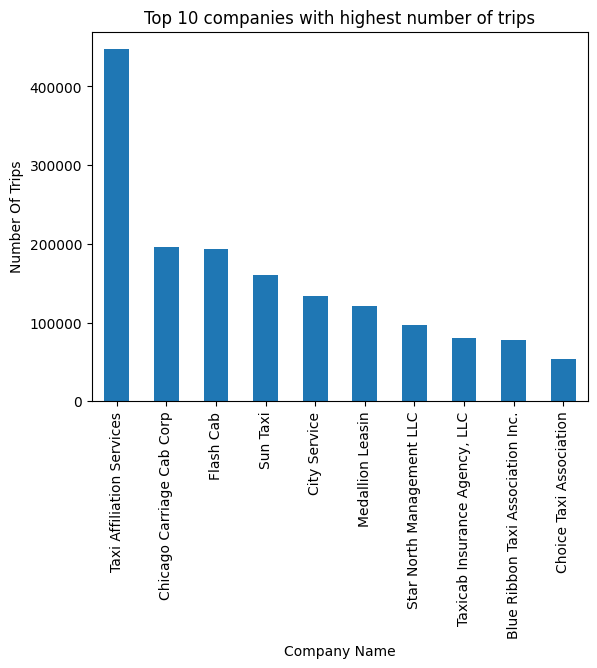

In [148]:
# Plotting Top 10 companies with highest number of trips
df['company'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 companies with highest number of trips')
plt.xlabel('Company Name')
plt.ylabel('Number Of Trips')

Text(0, 0.5, 'Number of miles')

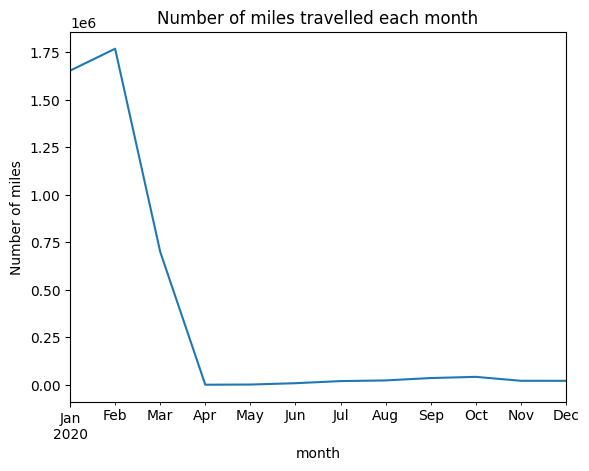

In [149]:
#Plotting Number of miles travelled per month in 2020
df.groupby('month')['trip_miles'].sum().plot()#.bar()
plt.title('Number of miles travelled each month')
plt.xlabel('month')
plt.ylabel('Number of miles')

Text(0, 0.5, 'sum of tips')

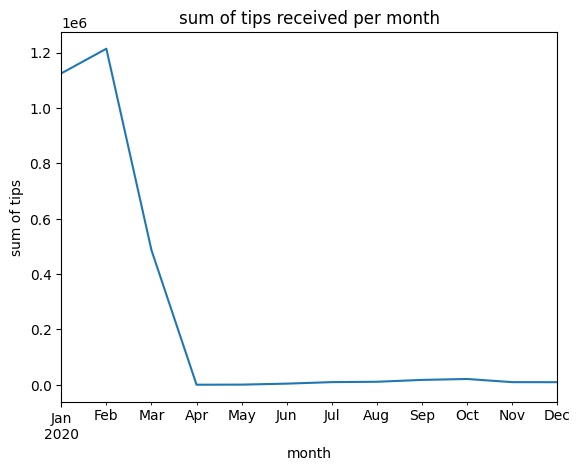

In [150]:
#Plotting sum of tips received per month in 2020
df.groupby('month')['tips'].sum().plot()#.bar()
plt.title('sum of tips received per month')
plt.xlabel('month')
plt.ylabel('sum of tips')

Text(0, 0.5, 'Number of Trips')

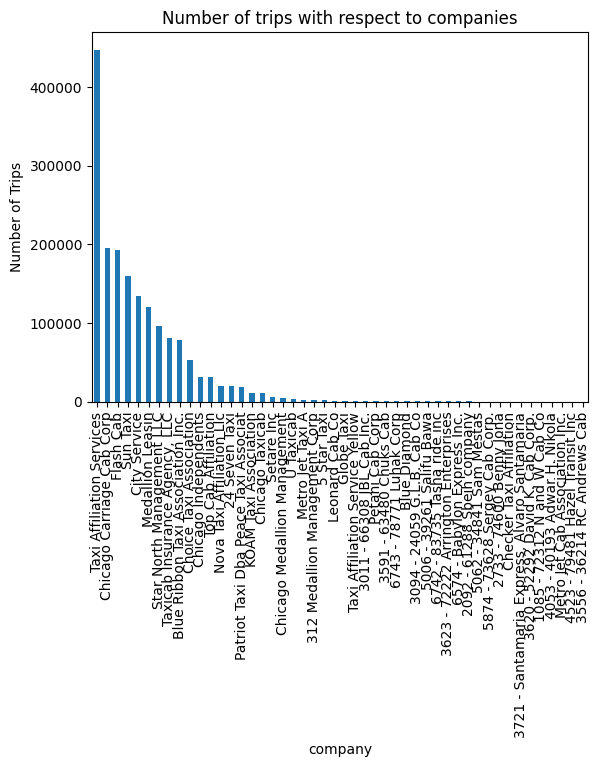

In [151]:
# Plotting all companies with total number of trips
df['company'].value_counts().plot(kind='bar')
plt.title('Number of trips with respect to companies')
plt.xlabel('company')
plt.ylabel('Number of Trips')